In [1]:
!git clone https://github.com/MaxEland07/DCE-MRI-data-noise-reduction.git

Cloning into 'DCE-MRI-data-noise-reduction'...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 396 (delta 28), reused 192 (delta 15), pack-reused 180 (from 1)
Receiving objects: 100% (396/396), 37.37 MiB | 38.46 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [2]:
%cd /kaggle/working/DCE-MRI-data-noise-reduction

/kaggle/working/DCE-MRI-data-noise-reduction


In [3]:
!pip install wfdb 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 4.6 MB/s eta 0:00:00


In [4]:
!python Download-MIT-Kaggle.py

Generating record list for: 118
Generating list of all files for: 118
Finished downloading files
Successfully downloaded 118
Generating record list for: 119
Generating list of all files for: 119
Finished downloading files
Successfully downloaded 119
Successfully downloaded 118e24
Successfully downloaded 118e18
Successfully downloaded 118e12
Successfully downloaded 118e06
Successfully downloaded 118e00
Successfully downloaded 118e_6
Successfully downloaded 119e24
Successfully downloaded 119e18
Successfully downloaded 119e12
Successfully downloaded 119e06
Successfully downloaded 119e00
Successfully downloaded 119e_6
Download complete!
Loaded clean record 118, length: 650000
Loaded clean record 119, length: 650000
Loaded noisy record 118e24, length: 650000
Generated 167 chunks for 118e24 segment 1
Generated 167 chunks for 118e24 segment 2
Generated 167 chunks for 118e24 segment 3
Loaded noisy record 118e18, length: 650000
Generated 167 chunks for 118e18 segment 1
Generated 167 chunks for 

In [5]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Load data
data_dir = './MIT-BIH-ST-Dataset/Train_Test_Data'
X_train = np.load(os.path.join(data_dir, 'mit_st_X_train.npy'))
y_train = np.load(os.path.join(data_dir, 'mit_st_y_train.npy'))
X_test = np.load(os.path.join(data_dir, 'mit_st_X_test.npy'))
y_test = np.load(os.path.join(data_dir, 'mit_st_y_test.npy'))

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4809, 512, 1)
y_train shape: (4809, 512, 1)
X_test shape: (1203, 512, 1)
y_test shape: (1203, 512, 1)


In [6]:
!python train_lstm.py

2025-03-05 16:07:53.948530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-05 16:07:53.968026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-05 16:07:53.974025: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Loading pre-computed normalization statistics...
X_train shape: (4809, 512, 1)
y_train shape: (4809, 512, 1)
X_test shape: (1203, 512, 1)
y_test shape: (1203, 512, 1)
I0000 00:00:1741190877.002163     111 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See 

In [7]:
from IPython.display import Image, display

In [8]:
%ls

 analyze_and_normalize_data.py   Download-MIT-Kaggle.py   MIT-BIH-ST-Dataset/
'Data Preparation'/              Graphs/                  README.md
'Deep learning Filters'/         LICENSE                  training.ipynb
'DL pipline'/                    lstm_model_output/       train_lstm.py


In [1]:
img_path = 'lstm_model_output/example_0.png'  # Replace with your PNG path
display(Image(filename=img_path))

NameError: name 'Image' is not defined

Data loaded successfully!
X_train shape: (4809, 512, 1)
y_train shape: (4809, 512, 1)


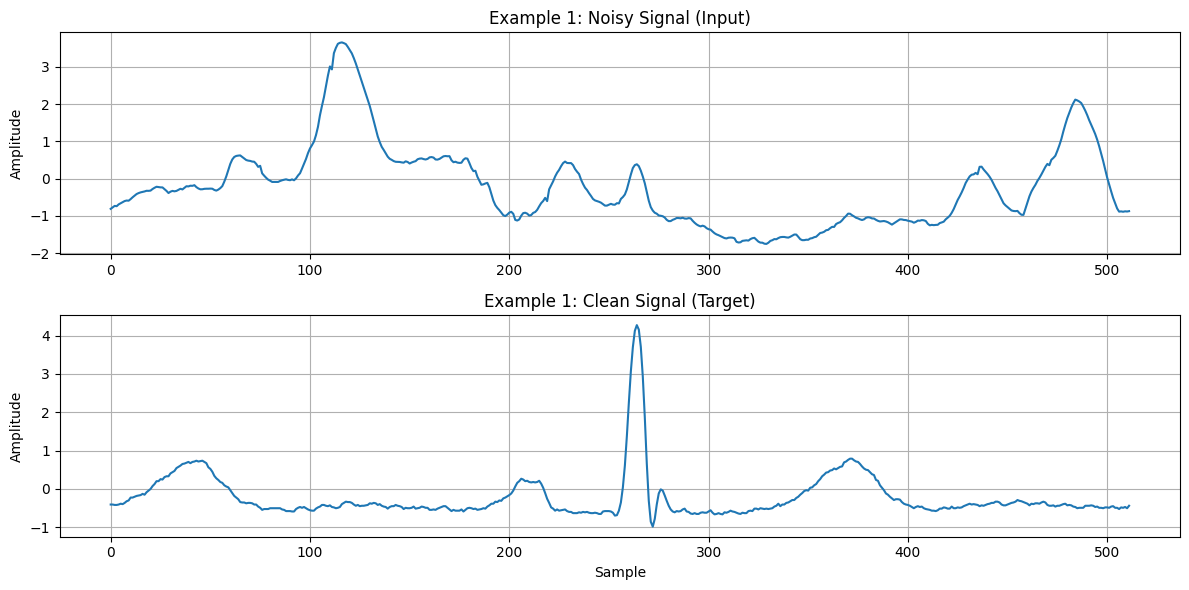

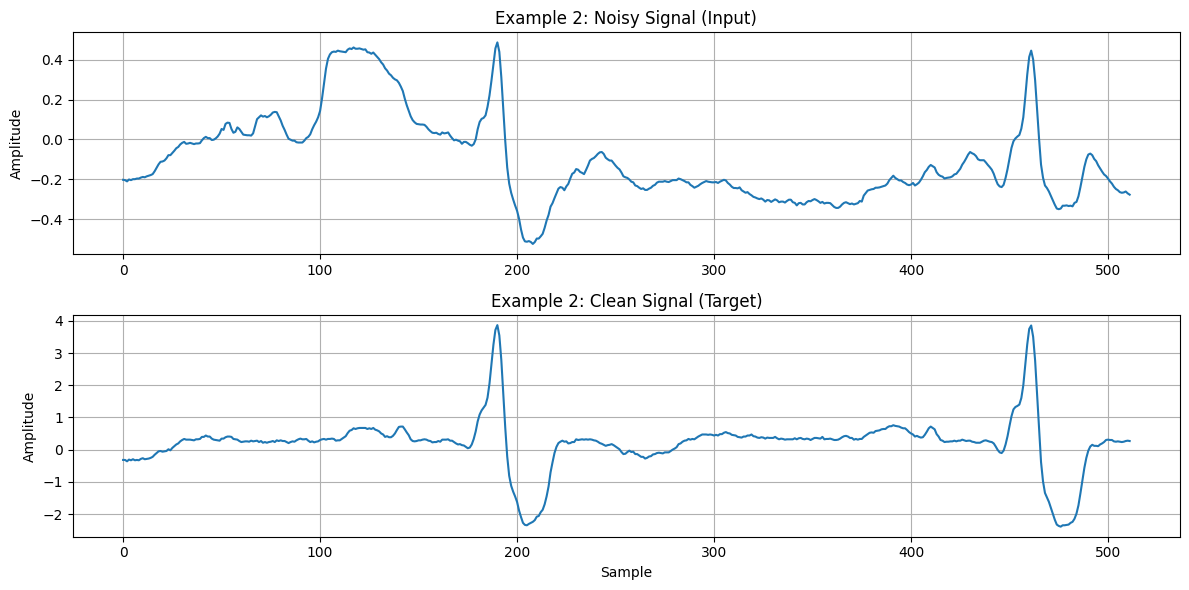

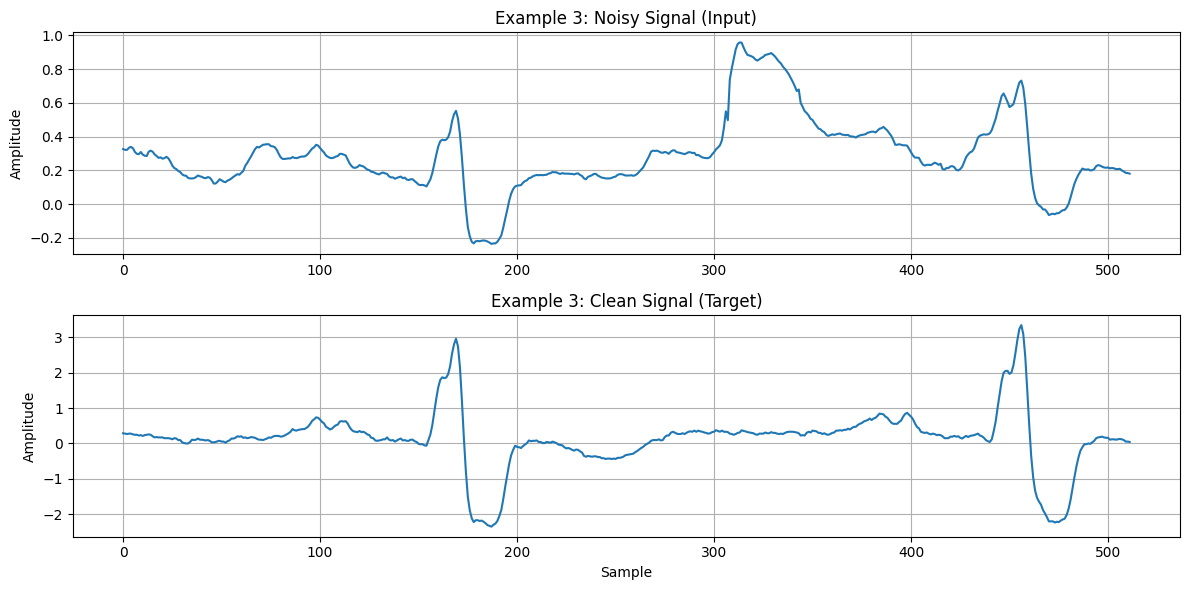

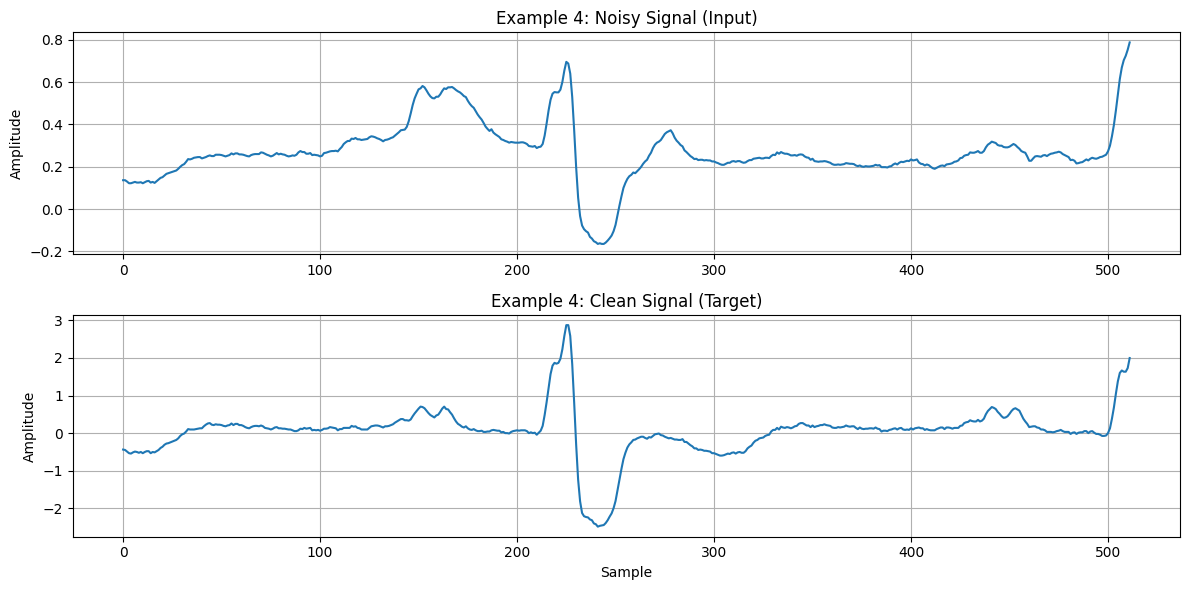

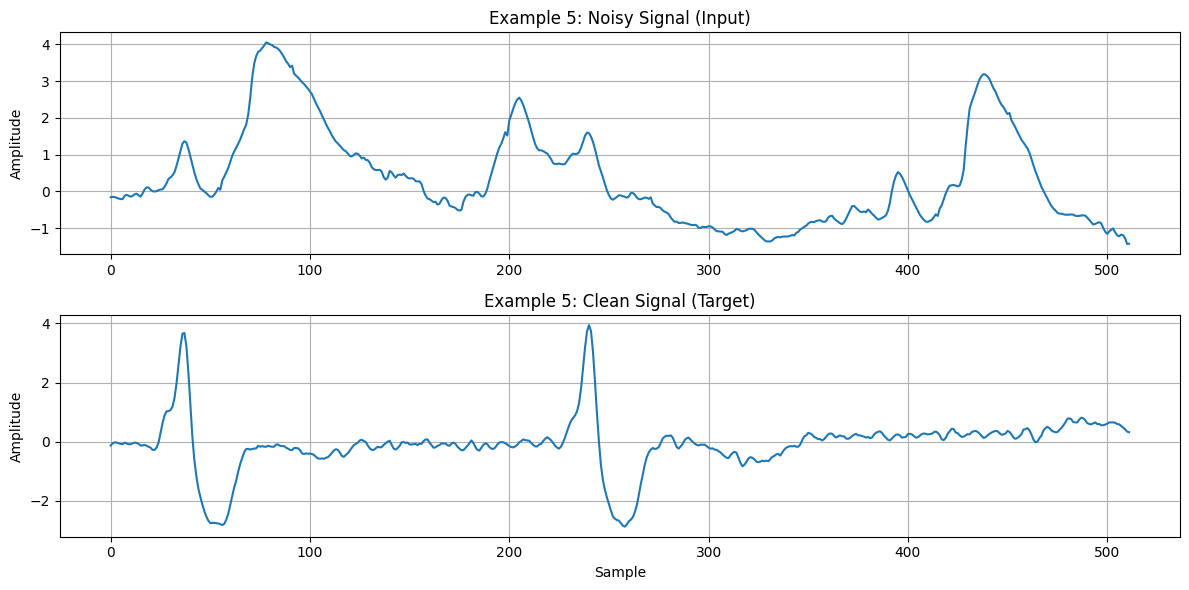

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the directory where your processed data is stored
base_dir = './MIT-BIH-ST-Dataset'
processed_data_dir = os.path.join(base_dir, 'Train_Test_Data')

# Function to load and visualize training pairs
def visualize_training_pairs(num_examples=5):
    """
    Load and visualize pairs of noisy and clean signals from the training data
    
    Args:
        num_examples: Number of examples to visualize (default: 5)
    """
    try:
        # Load the training data
        X_train = np.load(os.path.join(processed_data_dir, 'mit_st_X_train.npy'))
        y_train = np.load(os.path.join(processed_data_dir, 'mit_st_y_train.npy'))
        
        print(f"Data loaded successfully!")
        print(f"X_train shape: {X_train.shape}")
        print(f"y_train shape: {y_train.shape}")
        
        # Visualize the specified number of examples
        for i in range(min(num_examples, len(X_train))):
            plt.figure(figsize=(12, 6))
            
            # Plot the noisy signal (input)
            plt.subplot(2, 1, 1)
            plt.plot(X_train[i].flatten())
            plt.title(f'Example {i+1}: Noisy Signal (Input)')
            plt.ylabel('Amplitude')
            plt.grid(True)
            
            # Plot the clean signal (target)
            plt.subplot(2, 1, 2)
            plt.plot(y_train[i].flatten())
            plt.title(f'Example {i+1}: Clean Signal (Target)')
            plt.xlabel('Sample')
            plt.ylabel('Amplitude')
            plt.grid(True)
            
            plt.tight_layout()
            plt.show()
            
    except FileNotFoundError as e:
        print(f"Error: {e}")
        print("Make sure you've run the Download-MIT-Kaggle.py script first to generate the training data.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    visualize_training_pairs()